In [2]:
import os
import pandas as pd
import geopandas as gpd
%matplotlib notebook
from shapely.geometry import Point, LineString, Polygon
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
os.getcwd()

'C:\\Users\\ol348833\\Desktop\\GIS Project Files'

Check directory

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'COD_MiningZones_2017.cpg',
 'COD_MiningZones_2017.dbf',
 'COD_MiningZones_2017.prj',
 'COD_MiningZones_2017.qpj',
 'COD_MiningZones_2017.shp',
 'COD_MiningZones_2017.shx',
 'cod_mining_zones_2017',
 'cod_mining_zones_2017.zip',
 'gadm36_COD_0.cpg',
 'gadm36_COD_0.dbf',
 'gadm36_COD_0.prj',
 'gadm36_COD_0.shp',
 'gadm36_COD_0.shx',
 'gadm36_COD_1.cpg',
 'gadm36_COD_1.dbf',
 'gadm36_COD_1.prj',
 'gadm36_COD_1.shp',
 'gadm36_COD_1.shx',
 'gadm36_COD_2.cpg',
 'gadm36_COD_2.dbf',
 'gadm36_COD_2.prj',
 'gadm36_COD_2.shp',
 'gadm36_COD_2.shx',
 'gadm36_COD_shp',
 'gadm36_COD_shp.zip',
 'gedevents-2019-10-17.csv',
 'GIS Project.ipynb']

In [6]:
deaths = pd.read_csv('gedevents-2019-10-17.csv', encoding='latin-1')

In [7]:
congo = gpd.read_file('gadm36_COD_1.shp')

<IPython.core.display.Javascript object>


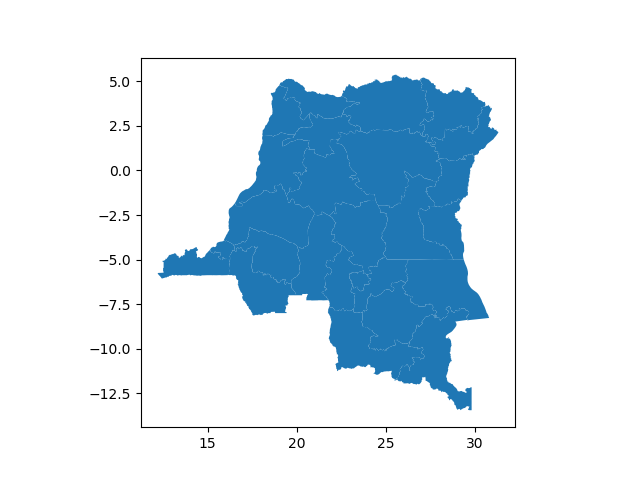

In [8]:
congo.plot()

In [8]:
deaths.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best_est,high_est,low_est
6803,NaN,1993,True,Clear,3,554,554,SPLM/A - Civilians,1021,1021,SPLM/A - Civilians,466,466,SPLM/A,1,1,Civilians,-1,"Radio National Unity/BBC, 1994-01-01",NaN,NaN,NaN,Al-Inqadh al-Watani newspaper,6,DR Congo (Zaire),NaN,NaN,NaN,0.000000,25.000000,POINT (25.000000 0.000000),128551,DR Congo (Zaire),490,Africa,1,4,12/01/1993 00:00:00,12/31/1993 00:00:00,0,0,4,0,4,4,4,NaN
9607,NaN,1996,True,Clear,3,951,951,CNDD - Civilians,1422,1422,CNDD - Civilians,431,431,CNDD,1,1,Civilians,-1,UN mapping report,NaN,NaN,NaN,NaN,2,Kamituga village,NaN,Sud Kivu region,Mwenga zone,-3.055278,28.181944,POINT (28.181944 -3.055278),124977,DR Congo (Zaire),490,Africa,2,4,11/01/1996 00:00:00,11/30/1996 00:00:00,0,0,50,0,50,50,50,NaN
9735,NaN,2003,True,Clear,3,552,552,CNDD-FDD - Civilians,1019,1019,CNDD-FDD - Civilians,434,434,CNDD-FDD,1,1,Civilians,-1,HRW: Civilians in the Burundian war,NaN,NaN,NaN,NaN,1,Kiliba town,NaN,Sud Kivu province,Uvira territory,-3.260503,29.203650,POINT (29.203650 -3.260503),124979,DR Congo (Zaire),490,Africa,1,1,10/09/2003 00:00:00,10/09/2003 00:00:00,0,0,9,0,9,9,9,NaN
9868,NaN,2003,True,Clear,3,552,552,CNDD-FDD - Civilians,1019,1019,CNDD-FDD - Civilians,434,434,CNDD-FDD,1,1,Civilians,-1,Reuters 2003-10-10 http://www.congoned.dds.nl/...,NaN,NaN,NaN,UN officials,1,Ndunda village,NaN,Sud Kivu province,Uvira territory,-3.051007,29.233390,POINT (29.233390 -3.051007),124979,DR Congo (Zaire),490,Africa,1,1,10/06/2003 00:00:00,10/06/2003 00:00:00,0,0,16,0,16,17,16,NaN
10068,NaN,1996,True,Clear,3,951,951,CNDD - Civilians,1422,1422,CNDD - Civilians,431,431,CNDD,1,1,Civilians,-1,UN mapping report,NaN,NaN,NaN,NaN,1,Kamituga village,NaN,Sud Kivu region,Mwenga zone,-3.055278,28.181944,POINT (28.181944 -3.055278),124977,DR Congo (Zaire),490,Africa,1,5,10/01/1996 00:00:00,11/30/1996 00:00:00,0,0,12,0,12,20,12,NaN


In [9]:
mines = gpd.read_file('COD_MiningZones_2017.shp')

<IPython.core.display.Javascript object>


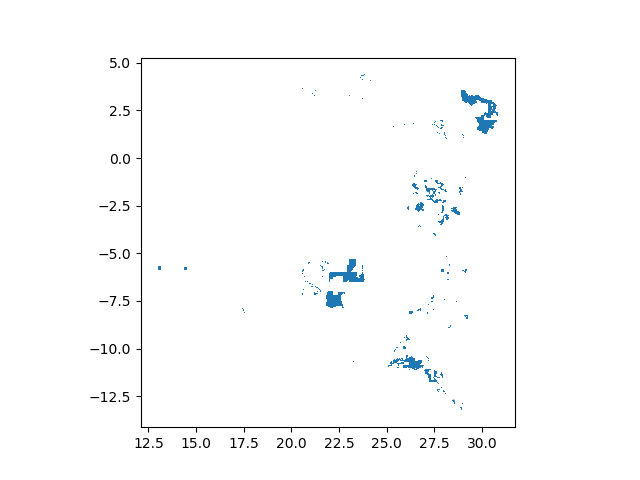

In [10]:
mines.plot()

In [12]:
keep_cols = ['where_coordinates', 'year', 'side_a', 'side_b', 'deaths_a', 'deaths_b', 
             'deaths_civilians', 'deaths_unknown', 'geom_wkt', 'relid']

In [13]:
deaths_small = deaths[keep_cols]

In [14]:
deaths_small.head()

,where_coordinates,year,side_a,side_b,deaths_a,deaths_b,deaths_civilians,deaths_unknown,geom_wkt,relid
6803,NaN,True,1,-1,0,4,0,4,128551,1993
9607,NaN,True,1,-1,0,50,0,50,124977,1996
9735,NaN,True,1,-1,0,9,0,9,124979,2003
9868,NaN,True,1,-1,0,16,0,16,124979,2003
10068,NaN,True,1,-1,0,12,0,12,124977,1996


In [15]:
mines.head()

,Name,descriptio,tessellate,extrude,visibility,Demand 16,SNEL 16,OTHER 2016,GAP 2016,Demand 30,SNEL 30,OTHER 30,GAP 30,geometry
0,AFRICAN MINERALS (Barbados) Ltd Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((25.2250000003564 -10.8333333003332...
1,AFRICAN MINERALS (Barbados) Ltd Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((25.0583333001425 -10.9083333002918...
2,AFRICAN MINERALS (Barbados) Ltd Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((25.233333300243 -10.8333333003332 ...
3,AMB KASAI Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((20.5833333001417 -6.10833329994012...
4,AMB KASAI Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((20.5916666997412 -6.20833329995253...


<IPython.core.display.Javascript object>


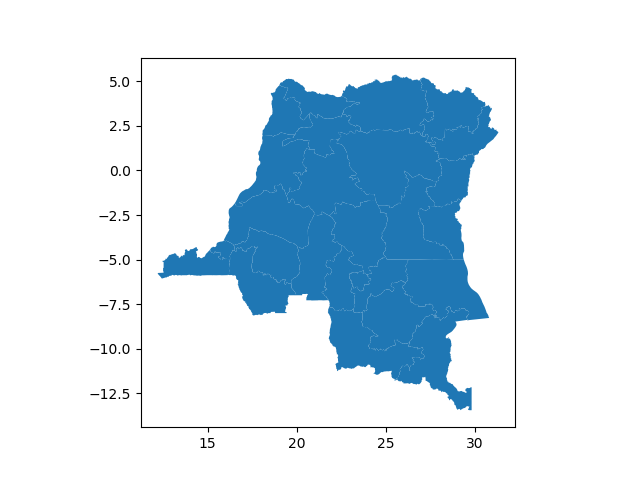

<IPython.core.display.Javascript object>


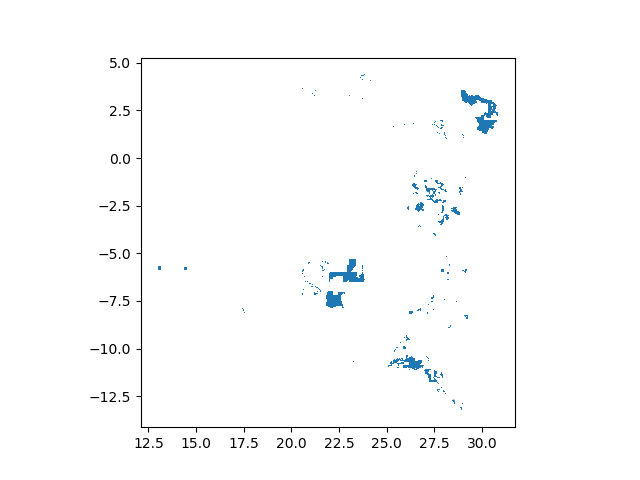

In [16]:
congo.plot()
mines.plot()

I want to try to get the mines to overlay the congo file and mark it as a different color.

<IPython.core.display.Javascript object>


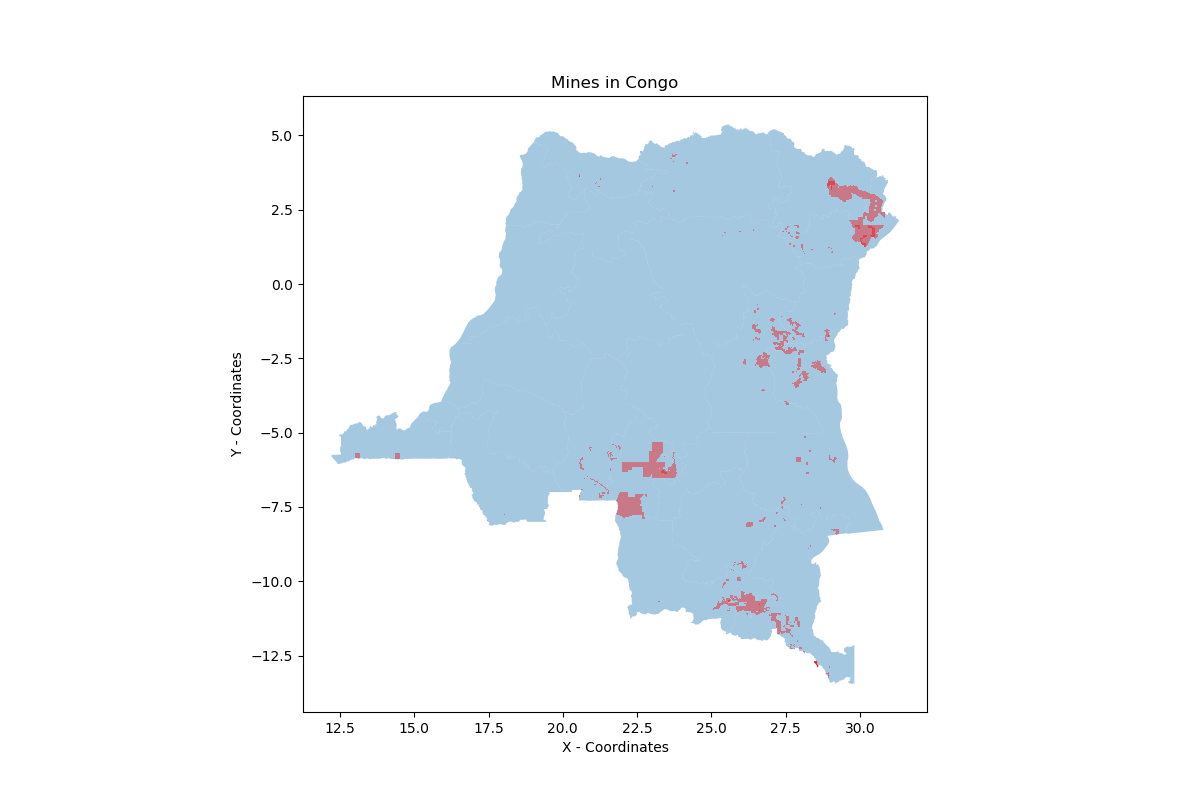

Text(0.5,1,'Mines in Congo')

In [16]:
fig, ax = plt.subplots(1, figsize=(12, 8))
congo.plot(ax=ax, alpha=0.4)
mines.plot(ax=ax, color='red', alpha=0.4)
ax.set_aspect('equal')
plt.ylabel("Y - Coordinates")
plt.xlabel("X - Coordinates")
plt.title("Mines in Congo")

I used the code from Lab 2's Florida Section. I really just needed to combine the two, so I'm happy.

Now I'm trying to figure out how to isolate indivudual years within my 'deaths' data.

In [17]:
deaths.relid.describe()

count    3798.000000
mean     2008.815692
std         7.461374
min      1989.000000
25%      2002.000000
50%      2009.000000
75%      2016.000000
max      2018.000000
Name: relid, dtype: float64

In [18]:
cross_98 = deaths.loc[deaths['relid'] == 1998]

In [45]:
cross_98.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best_est,high_est,low_est
20199,NaN,1998,True,Clear,1,283,283,DR Congo (Zaire): Government,585,585,Government of DR Congo (Zaire) - MLC,89,89,Government of DR Congo (Zaire),423,423,MLC,-1,"Agence France Presse dispatch, Kisangani, 13 N...",NaN,NaN,NaN,Red Cross,1,Dulia location,NaN,Orientale province,Aketi territory,2.950000,24.133333,POINT (24.133333 2.950000),133609,DR Congo (Zaire),490,Africa,1,1,11/29/1998 00:00:00,11/29/1998 00:00:00,122,0,0,0,122,150,122,NaN
20205,NaN,1998,True,Clear,3,548,548,RCD - Civilians,1015,1015,RCD - Civilians,424,424,RCD,1,1,Civilians,-1,http://www.congoned.dds.nl/chroni28.html,NaN,NaN,NaN,MISNA,1,Kalungu location,NaN,Sud Kivu province,Kalehe territory,-1.750000,29.010000,POINT (29.010000 -1.750000),127139,DR Congo (Zaire),490,Africa,1,1,12/15/1998 00:00:00,12/15/1998 00:00:00,0,0,8,0,8,8,8,NaN
20207,NaN,1998,True,Clear,3,467,467,Government of DR Congo (Zaire) - Civilians,934,934,Government of DR Congo (Zaire) - Civilians,89,89,Government of DR Congo (Zaire),1,1,Civilians,-1,A/53/365,NaN,NaN,NaN,NaN,1,Kimbanseke location,NaN,Kinshasa city region,Tshangu zone,-4.426111,15.374444,POINT (15.374444 -4.426111),123511,DR Congo (Zaire),490,Africa,1,1,02/09/1998 00:00:00,02/09/1998 00:00:00,0,0,2,0,2,2,2,NaN
20209,NaN,1998,True,Clear,1,283,283,DR Congo (Zaire): Government,586,586,Government of DR Congo (Zaire) - RCD,89,89,Government of DR Congo (Zaire),424,424,RCD,-1,mewpan0020010925du83001d7,NaN,NaN,NaN,NaN,1,Kinshasa city,NaN,Kinshasa city province,NaN,-4.329722,15.315000,POINT (15.315000 -4.329722),123511,DR Congo (Zaire),490,Africa,1,1,08/03/1998 00:00:00,08/03/1998 00:00:00,20,0,10,0,30,30,30,NaN
20266,NaN,1998,True,Clear,1,283,283,DR Congo (Zaire): Government,586,586,Government of DR Congo (Zaire) - RCD,89,89,Government of DR Congo (Zaire),424,424,RCD,-1,"FOCUS - Congo rebels attack Kinshasa, army hit...",NaN,NaN,NaN,Residents in the suburb of Masina,1,Kinshasa city,NaN,Kinshasa city province,NaN,-4.329722,15.315000,POINT (15.315000 -4.329722),123511,DR Congo (Zaire),490,Africa,1,1,08/26/1998 00:00:00,08/26/1998 00:00:00,3,0,0,0,3,3,3,NaN


That works better.

In [26]:
cross_98.longitude.head()

20199     POINT (24.133333 2.950000)
20205    POINT (29.010000 -1.750000)
20207    POINT (15.374444 -4.426111)
20209    POINT (15.315000 -4.329722)
20266    POINT (15.315000 -4.329722)
Name: longitude, dtype: object

In [25]:
cross_98.latitude.head()

20199    24.133333
20205    29.010000
20207    15.374444
20209    15.315000
20266    15.315000
Name: latitude, dtype: float64

In [49]:
cross_98_point = [Point(xy) for xy in zip(cross_98.adm_2, cross_98.latitude)]

In [50]:
cross_98_gdf = gpd.GeoDataFrame(cross_98, geometry = cross_98_point)

In [51]:
from fiona.crs import from_epsg
cross_98_gdf.crs = from_epsg(4326)

In [52]:
cross_98_gdf.geometry

20199                   POINT (2.95 24.133333)
20205                      POINT (-1.75 29.01)
20207              POINT (-4.426111 15.374444)
20209                 POINT (-4.329722 15.315)
20266                 POINT (-4.329722 15.315)
20292              POINT (-2.066667 28.566667)
20294                             POINT (0 25)
22972                POINT (2.736971 23.78071)
22989              POINT (-4.348611 15.279722)
23012                    POINT (0.5 29.466667)
23062              POINT (-2.508333 28.860833)
23066                      POINT (-5.85 13.05)
23069               POINT (3.816667 23.866666)
23079              POINT (-2.508333 28.860833)
23083              POINT (-2.508333 28.860833)
23097              POINT (-2.508333 28.860833)
23109              POINT (-2.508333 28.860833)
23112              POINT (-2.508333 28.860833)
23143               POINT (2.183333 22.466667)
23184              POINT (-2.066667 28.566667)
23204                POINT (3.333333 20.83333)
23205        

<IPython.core.display.Javascript object>


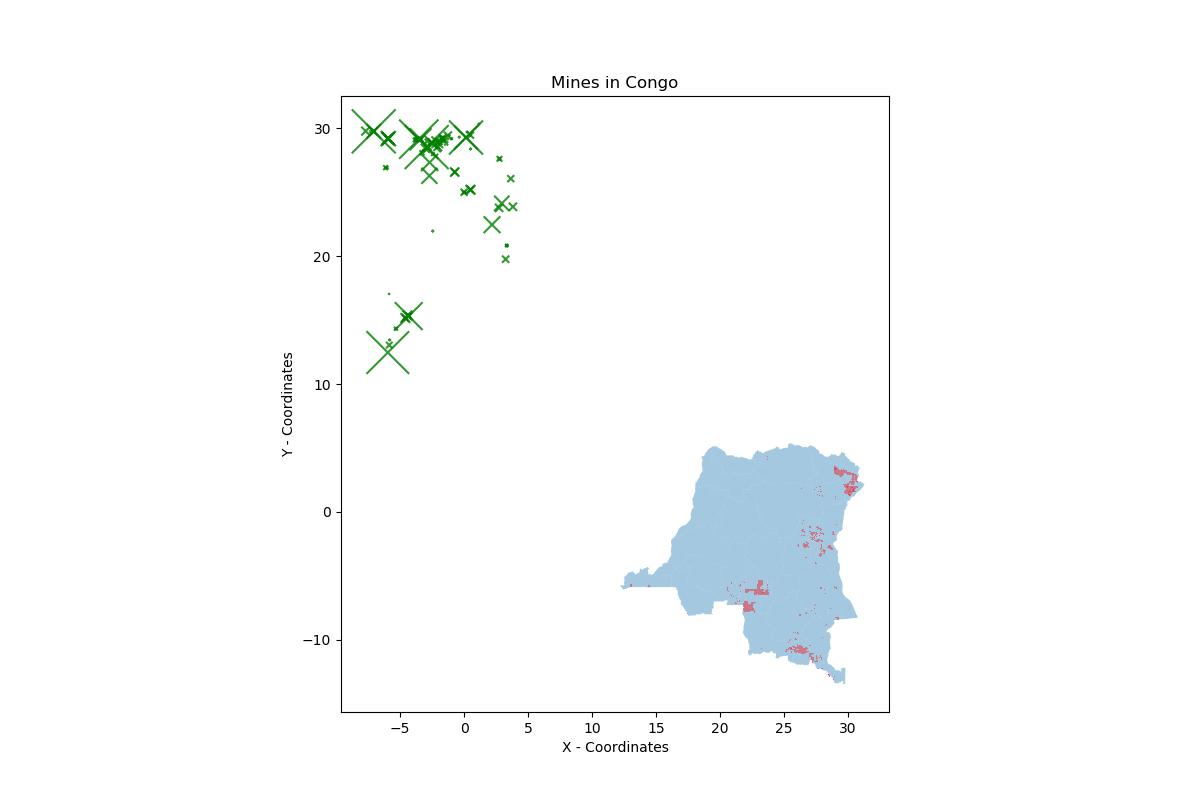

Text(0.5,1,'Mines in Congo')

In [58]:
fig, ax = plt.subplots(1, figsize=(12, 8))
cross_98_gdf.plot(ax=ax,marker='x', markersize=cross_98_gdf['deaths_unknown'], color='green',alpha=.8)
congo.plot(ax=ax, alpha=0.4)
mines.plot(ax=ax, color='red', alpha=0.4)
ax.set_aspect('equal')
plt.ylabel("Y - Coordinates")
plt.xlabel("X - Coordinates")
plt.title("Mines in Congo")